# This notebook performs a simulation of a rope where ANCF is used to model the large deformation

### Generalized form of Jourdain's Principle is used to develop the mass matrix

In [1]:
import numpy as np
import scipy as sp
import sympy as sym
import pickle

from IPython.display import display

from sympy import init_printing
init_printing(use_latex=True)

#### Define symbolic quantites

In [2]:
# nodal positons, velocities, and accelerations
"""
    e = [r1x r1y dr1xdx dr1ydx r2x r2y dr2xdx dr2ydx]
    e = 1x8 for a 2D beam
"""

# nodal positions
e = sym.Matrix(sym.symarray('e',8))
# nodal velocities
e_dot = sym.Matrix(sym.symarray('edot',len(e)))
# nodal accelerations
e_ddot = sym.Matrix(sym.symarray('eddot',len(e)))

# symbolic system parameters 
E, I, A, rho, x, l, tau_a = sym.symbols('E I A rho x l tau_a')

### Compute the Mass Matrix

S = 


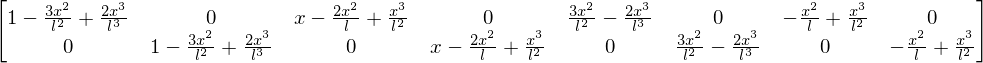


Vp = 


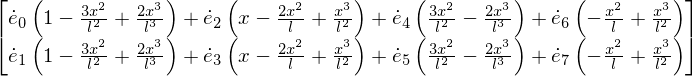


V_r = 


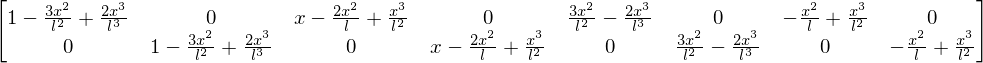


Ap = 


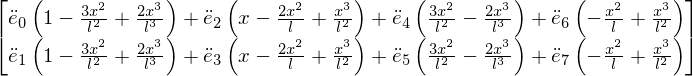


M = 


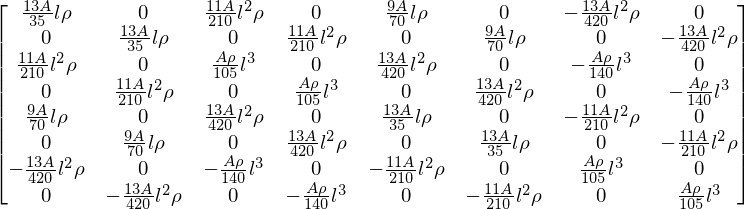

In [3]:
# define shape functions
s = sym.symarray('s',4)

s[0] = 1-3*(x/l)**2+2*(x/l)**3;
s[1] = x/l-2*(x/l)**2+(x/l)**3;
s[2] = 3*(x/l)**2-2*(x/l)**3;
s[3] = (x/l)**3-(x/l)**2;

# compute shape function matrix
S = sym.expand(sym.Matrix([s[0]*sym.eye(2), l*s[1]*sym.eye(2), s[2]*sym.eye(2), l*s[3]*sym.eye(2)])).T
print('S = ')
display(S)


# define velocity of all points on the beam
# print(S.shape)
# print(e_dot.shape)
Vp = S*e_dot
print('\nVp = ')
display(Vp)

# define partial velocities of the nodes 
V_r = sym.Matrix([[sym.diff(Vp[j],e_dot[i]) for j in range(len(Vp))] for i in range(len(e))]).T
print('\nV_r = ')
display(V_r)
# print()

# define acceleration of the nodes
Ap = S*e_ddot
print('\nAp = ')
display(Ap)
# print()

M = sym.Matrix([[sym.expand(sym.integrate(V_r[:,j].dot(Ap)*rho*A,(x,0,l))).coeff(e_ddot[i]) for i in range(len(e))]
                for j in range(len(e))])
print('\nM = ')
display(M)
pickle.dump( M, open( "mass-matrix.dump", "wb" ) )

### Compute Internal forces
(Berzeri, Shabana - 2000 - DEVELOPMENT OF SIMPLE MODELS FOR THE ELASTIC FORCES IN THE ABSOLUTE NODAL CO-ORDINATE FORMULATION)

#### Compute Longitudinal Strain Energy

In [4]:
# Compute epsilon with approximation 2 (78)
er = sym.Matrix([0, 0, 1, 0, 1, 0, 1, 0])
epsilon_squared = sym.simplify(sym.expand(1/2*(e - er).dot(S.diff(x).T*S.diff(x)*(e + er))))
# display(epsilon_squared)

Ul = 1/2*sym.integrate(E*A*epsilon_squared, (x,0,l))

#### Compute Transverse Strain Energy

In [5]:
# Compute kappa (approximation 1: small longitudinal deformation - fine for rope)
kappa_squared = sym.simplify(sym.expand(e.dot(S.diff(x,x).T*S.diff(x,x)*e)))
# display(kappa_squared)

# Compute Transverse Strain Energy
Ut = 1/2*sym.integrate(E*I*kappa_squared, (x,0,l))

#### Compute Internal Forces $Q_e = \frac{\partial U}{\partial e}$

In [6]:
# Compute Total Energy
U = Ul + Ut

# Compute Internal Force Vector
Qe = sym.Matrix([sym.simplify(sym.expand(sym.diff(-U,node))) for node in e])

### Applied and body force vector

In [7]:
# Applied forces
# Gravity body force
fg = rho*9.81*A*sym.Matrix([0,-1])

# Applied torque
# torque_app = sym.Matrix([0,0,tau_a])

# Compute beta
# beta = sym.Matrix([sym.simplify(sym.integrate(vr.dot(fg), (x,0,l)) + qe) 
#                    for vr,qe in zip(V_r,Qe)])
beta = sym.Matrix([sym.simplify(sym.integrate(V_r[:,j].dot(fg), (x,0,l)))
                   + qe for j,qe in zip(range(len(e)),Qe)])
pickle.dump( beta, open( "force-vector.dump", "wb" ) )

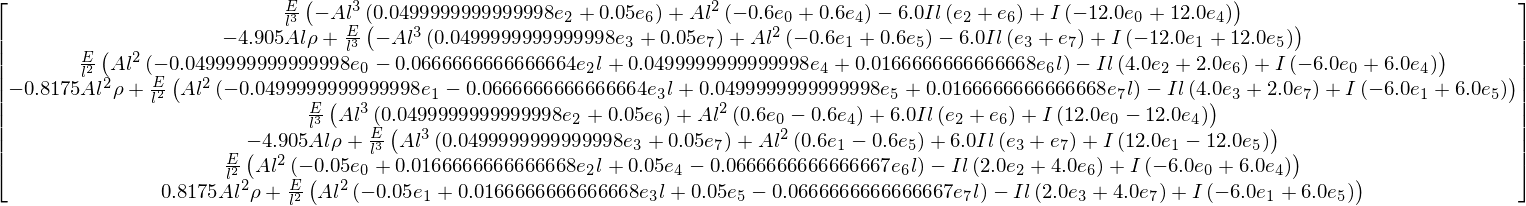

In [8]:
display(beta)

In [4]:
x = np.arange(1,10,1)
[print(x) for x in x]

1
2
3
4
5
6
7
8
9


[None, None, None, None, None, None, None, None, None]

In [7]:
y = [x+2 for x in x ]

In [8]:
y

[3, 4, 5, 6, 7, 8, 9, 10, 11]